# Análise dos dados das viagens realizadas a serviço
Com base nos dados disponibilizados Portal da Transparencia, vamos analisar os dados das viagens realizadas à serviço, pelos funcionários públicos federais, no ano de 2018.

Os dados podem ser baixados nesse site: http://www.transparencia.gov.br/download-de-dados/viagens

Dicionário de Dados: 
http://www.transparencia.gov.br/pagina-interna/603364-dicionário-de-dados-viagens-a-Serviço-Pagamentos

O Arquivo que será utilizado nesta análise exploratória está no formato CSV e será o **2018_Viagem.csv**

# Configução do ambiente

In [1]:
# Importando o módulo pandas
import pandas as pd

In [2]:
# Para mostrar os dados em gráfico, precisamos informar que queremos visualizar o gráfico dentro do notebook.
# Utilizaremos o framewrk matplot 
# Os dados serão visualizados em um gráfico de barras
%matplotlib inline 

# podemos configurar o IPython Notebook para produzir gráficos em SVG (formato vetorial), que não perde a definição.
%config InlineBackend.figure_format='svg'

# Leitura de arquivo csv

**Atenção:** Nesta análise exploratória será utilizado o arquivo CSV **2018_Viagem.csv**

In [3]:
# Carregando o arquivo csv
df = pd.read_csv('2018_Viagem.csv')

# UnicodeDecodeError: 'utf-8' codec can't decode : 
#    O problema ocorrido é devido à codificacao Unicode do arquivo

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 42: invalid continuation byte

In [ ]:
# Importando o arquivo passando o encoding
# O código cp1252 é o padrão de arquicos csv gerados pelo excel. No geral descobrimos os encoding pesquisando no google
df = pd.read_csv('2018_Viagem.csv'), encoding='cp1252' )

# ParserError: Error tokenizing data. 
#    O problema ocorrido é devido ao separador de campos utilizado no arquivo.

In [3]:
# O arquivo é separado por ';' e o encoding é cp1252
df = pd.read_csv('2018_Viagem.csv', sep=';', encoding='cp1252' )

É possivel importar apenas algumas colunas de um arquivo CSV<br>
Exemplo:
- 1 - Situação
- 3 - Nome do órgão superior
- 5 - Nome órgão solicitante
- 7 - Nome
- 8 - Cargo
- 9 - Período - Data de início
- 10 - Período - Data de fim
- 11 - Destinos
- 12 - Motivo
- 13 - Valor diárias
- 14 - Valor passagens
- 15 - Valor outros gastos

Código:<br>
df = pd.read_csv('_nomeDoArquivo_', sep=';', encoding='cp1252', usecols=[1, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15] )

Também é possivel trocar os nomes das colunas<br>
Código<br>
df.columns = ['situacao', 'superior', 'solicitante', 'nome', 'cargo', 'data_inicio', 'data_fim', 'destinos', 'motivo', 'valor_diarias', 'valor_passagens', 'valor_outros']



In [4]:
# Importando apenas as colunas que temos interesse
df = pd.read_csv('2018_Viagem.csv', sep=';', encoding='cp1252', usecols=[1, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15] )
# Modificando o nome das colunas 
df.columns = ['situacao', 'superior', 'solicitante', 'nome', 'cargo', 'data_inicio', 'data_fim', 'destinos', 'motivo', 'valor_diarias', 'valor_passagens', 'valor_outros']

# Comando para visualizar pequenas amostras dos dados

In [ ]:
# Exibe os primeiros cindo registros lidos
df.head()

In [ ]:
# Exibe os primeiros n registros do dataframe
df.head( 20 )

In [ ]:
# Exibe os ultimos n registros do dataframe
df.tail( 10)

In [ ]:
# Exibe linhas aleatórias, é obrigatório passar o número da amostra
df.sample( 10 )

In [ ]:
# comando para verificar o tamnho do dataframe.
# Formato(linhas, colunas)
df.shape

In [ ]:
# Verificar os tipos de dados das colunas 
df.dtypes

In [ ]:
# Função que conta o número de ocorrencias das colunas
df.count()

In [ ]:
# Analise matemática dos dados
df.describe()

In [ ]:
# DEscrever os dados
df.info()

# Comandos para manipulação dos dados e ajustes do DataFrame

## Ajustando as colunas de datas

In [5]:
# Convertendo a coluna 'data_inicio'
df['data_inicio'] = pd.to_datetime(df['data_inicio'])

In [6]:
# Convertendo a coluna 'data_inicio'
df['data_fim'] = pd.to_datetime(df['data_fim'])

## Ajustando os campos com valores monentários

In [7]:
df['valor_diarias'] = pd.to_numeric( df['valor_diarias'].str.replace( ',', '.') )

In [8]:
df['valor_passagens'] = pd.to_numeric( df['valor_passagens'].str.replace( ',', '.') )

In [9]:
df['valor_outros'] = pd.to_numeric( df['valor_outros'].str.replace( ',', '.') )

## Adicioando uma nova coluna: valor_total 

In [10]:
# Criando uma nova coluna
df['valor_total'] = df['valor_diarias'] + df['valor_passagens']+ df['valor_outros']

In [11]:
# Verificando os campos do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980757 entries, 0 to 980756
Data columns (total 13 columns):
situacao           980757 non-null object
superior           980757 non-null object
solicitante        980757 non-null object
nome               980757 non-null object
cargo              714270 non-null object
data_inicio        980757 non-null datetime64[ns]
data_fim           980757 non-null datetime64[ns]
destinos           980757 non-null object
motivo             980757 non-null object
valor_diarias      980757 non-null float64
valor_passagens    980757 non-null float64
valor_outros       980757 non-null float64
valor_total        980757 non-null float64
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 97.3+ MB


## Filtrando os dados 

In [12]:
## Filtrando os dados para obter apenas as viagens realizadas
df = df[ df['situacao'] == 'Realizada' ]

In [13]:
## Filtrando os dados para obter apenas as viagens realizadas
df_if = df[ (df['superior'] == 'Ministério da Educação') & (df['solicitante'].str.contains( 'Instituto Federal' )) ].copy()

In [14]:
# Filtranto os dados apenas pelo instituto federal da Bahia
df_ifba = df[ (df['superior'] == 'Ministério da Educação') & (df['solicitante'].str.contains( 'Instituto Federal da Bahia' )) ].copy()

In [15]:
# Filtranto os dados apenas pelo instituto federal da Bahia
df_ifpe = df[ (df['superior'] == 'Ministério da Educação') & (df['solicitante'].str.contains( 'Instituto Federal de Pernambuco' )) ].copy()

In [16]:
# Filtranto os dados apenas pelo instituto federal da Ceara
df_ifce = df[ (df['superior'] == 'Ministério da Educação') & (df['solicitante'].str.contains( 'Instituto Federal do Ceará' )) ].copy()

In [17]:
# Filtranto os dados apenas pelo instituto federal da Ceara
df_ifsp = df[ (df['superior'] == 'Ministério da Educação') & (df['solicitante'].str.contains( 'Instituto Federal de São Paulo' )) ].copy()

## Explorando os dados

In [ ]:
#Lista dos 10 maiores valores pagos de todos os orgaos
df.nlargest(10, 'valor_total')

In [ ]:
# Lista dos 10 maiores valores pagos nos institutos federais
df_if.nlargest(10, 'valor_total')

In [ ]:
# Lista dos 10 maiores valores pagos no instituto federal da bahia
df_ifba.nlargest(10, 'valor_total')

In [ ]:
# Funcionários Públicos do IFBA com maiores valores de viagens
df_ifba.groupby('nome')['valor_total'].sum().nlargest(10)

In [ ]:
# Destinos mais requisitados
df_ifba.groupby('destinos')['valor_total'].count().nlargest(10)

In [ ]:
# Os 10 destinos onde se gastou mais com viagens
df_ifba.groupby('destinos')['valor_total'].sum().nlargest(10)

In [ ]:
# Meses que mais se viaja no IFBA 
df_ifba['data_inicio'].dt.month.value_counts().sort_index().plot.line()

In [ ]:
# Meses que mais 
df_ifba.groupby( df_ifba['data_inicio'].dt.month )['valor_total'].sum().plot.line(title='Distribuição de valores')

In [18]:
# Criando um objeto com o mes e o valor gasto para cada instituto
df_ifba_val = df_ifba.groupby( df_ifba['data_inicio'].dt.month )['valor_total'].sum()
df_ifce_val = df_ifce.groupby( df_ifce['data_inicio'].dt.month )['valor_total'].sum()
df_ifpe_val = df_ifpe.groupby( df_ifpe['data_inicio'].dt.month )['valor_total'].sum()
df_ifsp_val = df_ifsp.groupby( df_ifsp['data_inicio'].dt.month )['valor_total'].sum()
df_ifmedia  = df_if.groupby( df_if['data_inicio'].dt.month )['valor_total'].mean()


In [ ]:
df_ifsp_val

In [19]:
df_ifs_valores = pd.DataFrame(
    {
        'IFBA' : df_ifba_val.values,
        'IFCE' : df_ifce_val.values,
        'IFPE' : df_ifpe_val.values,
        'IFSP' : df_ifsp_val.values,
        'MEDIA': df_ifmedia.values,
    }, index=[1,2,3,4,5,6,7,8,9,10,11,12])

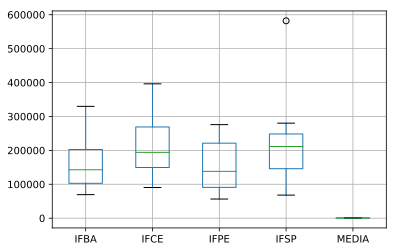

In [55]:
df_ifs_valores.boxplot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x120fa29b0>,
      dtype=object)

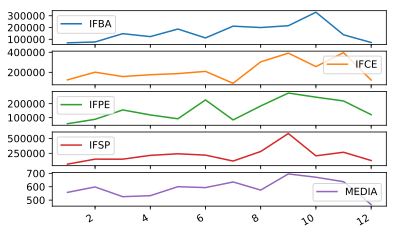

In [52]:
# Gastos com viagens por mes em graficos diferentes 
df_ifs_valores.plot.line(subplots=True)

In [ ]:
# Gastos com viagens por mes em um unico graficos de linha
df_ifs_valores.plot.line()

In [ ]:
# Distribuicao dos gastos com viagems por mes em varios graficos de barras
df_ifs_valores.plot.bar(subplots=True)

In [ ]:
# Distribuicao dos gastos com viagems por mes em um unico graficos de barras
df_ifs_valores.plot.bar()

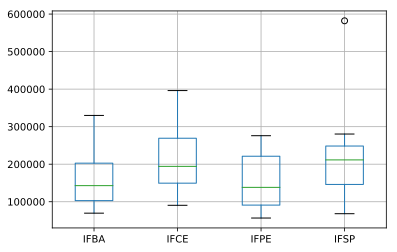

In [57]:
# Identificacao de um outlier
df_ifs_valores.boxplot(['IFBA', 'IFCE', 'IFPE', 'IFSP'])

***

## Mineracao de texto

### Nuvem de palavras 

Para que a imagem com a nuvem de palavras seja gerada, devemos instalar as biblitecas: NLTK e WordCloud. Para isso utiliza os comando listados abaixo:
- conda install -c conda-forge wordcloud 
- conda install -c conda-forge nltk_data 

In [20]:
import matplotlib.pyplot as plt
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud
import string

In [21]:
destinos = df_ifba['destinos']
palavras = list( destinos.values )
strListaPalavras = str(palavras)[1:-1]

In [22]:
stops = stopwords.words('portuguese')
mapa_cores = ListedColormap(['orange', 'green', 'red', 'magenta'])
nuvem = WordCloud(background_color = 'white',
                  colormap = mapa_cores,
                  stopwords = stops,
                  max_words = 100)

In [23]:
nuvem.generate(strListaPalavras)

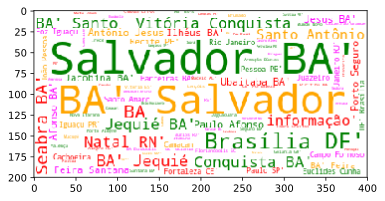

In [24]:
plt.imshow(nuvem)

***

## Obrigado - Othon Campos - <a href="https://www.portal.ifba.edu.br/paulo-afonso"> IFBA - Paulo Afonso</a>